In [28]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [29]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [30]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [31]:
from sklearn.model_selection import train_test_split

# Split fish_data and fish_target
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
# Save training data
kn.fit(train_input, train_target)

# Calculate scores
kn.score(test_input, test_target)

1.0

In [33]:
# Weird data is printed
print(kn.predict([[25, 150]]))

[0.]


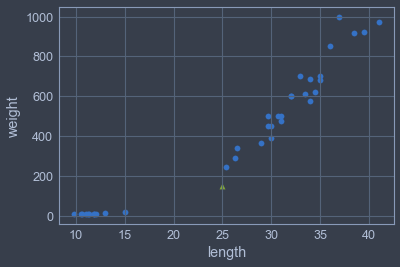

In [34]:
import matplotlib.pyplot as plt

# Print it out input 0, 1 data in a graph
plt.scatter(train_input[:,0], train_input[:,1])

# Insert the data used in prediction
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

# Weird, this sample is predicted what is close with another data
plt.show()

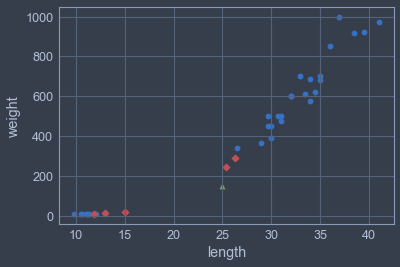

In [35]:
# kneighbors() method finds the most nearest data in neighbors
# The count of default result is 5, so 5 neighbors will be returned
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [36]:
# Check out 5 samples
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


In [38]:
# 0 is not proper value we want
print(train_target[indexes])

[[1. 0. 0. 1. 0.]]


In [39]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


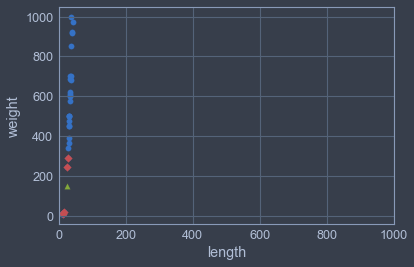

In [40]:
# Let's make a datum point

# First, limit the range of x dimension
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

# This is the point of make a limit for x dimension, to check the distance of each predicted values
plt.xlim((0, 1000))

plt.xlabel('length')
plt.ylabel('weight')

# This process is named with 'Data Preprocessing'
plt.show()

In [41]:
# Figure out standard score, and standard deviation
# axis=0 : Average, and standard deviation should be calculated wich each attributes, because they have various scales for its values

# Calculate average
mean = np.mean(train_input, axis=0)

# Calculate standard deviation
std = np.std(train_input, axis=0)

In [42]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [43]:
# Calculate standard score
# Using the built-in feature; broadcasting in the numpy
train_scaled = (train_input - mean) / std

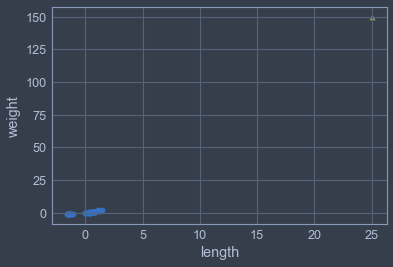

In [44]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

# Weird, because training sets were not converted with same ratio
plt.show()

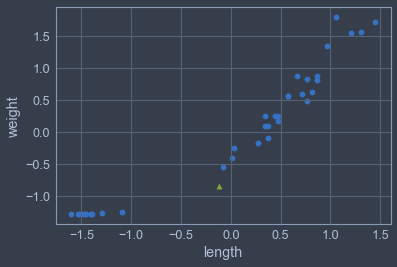

In [45]:
# Convert with mean, and std of training sets
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [46]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [47]:
# Prediction succeed
print(kn.predict([new]))

[1.]


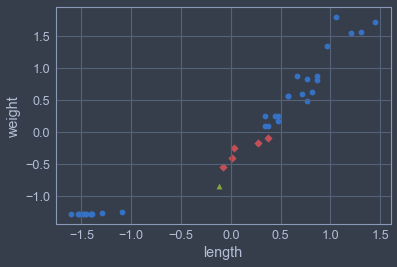

In [48]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()